### Mining the live tweets to find which words are most frequently mentioned with "trump" in Twitter :)

In [1]:
#install.packages('tm',repos='http://cran.us.r-project.org')
#install.packages('twitteR',repos='http://cran.us.r-project.org')
#install.packages('wordcloud',repos='http://cran.us.r-project.org')
#install.packages('RColorBrewer',repos='http://cran.us.r-project.org')
#install.packages('e1017',repos='http://cran.us.r-project.org')
#install.packages('class',repos='http://cran.us.r-project.org')

In [2]:
library(twitteR)
library(tm)
library(wordcloud)
library(RColorBrewer)

Warning message:
"package 'twitteR' was built under R version 3.3.3"Warning message:
"package 'tm' was built under R version 3.3.3"Loading required package: NLP
Warning message:
"package 'wordcloud' was built under R version 3.3.3"Loading required package: RColorBrewer


In [3]:
setup_twitter_oauth(consumer_key = 'KsIYto8YaIraC1IFq0WzqmivH', 
                    consumer_secret = 'YQv3u6GS9L1iQKOnQw3RF9oIKPDqsh9bCVcB82nQl9MwX9Qz4o', 
                    access_token = '23032405-ECuOigic4lweMdZFpPm29LqEdbUU2mI6CXOqv8IGI', 
                    access_secret = 'Opf1rAJSaVz3fLBEZrpdZY6S6gltLNb3VHGX1ZaWIBuZe')

[1] "Using direct authentication"


In [4]:
trump.tweets <- searchTwitter("trump", n=2000, lang="en")
trump.text <- sapply(trump.tweets, function(x) x$getText())

In [5]:
trump.text <- iconv(trump.text, 'UTF-8', 'ASCII') # remove emoticons
trump.corpus <- Corpus(VectorSource(trump.text)) # create a corpus

In [6]:
# remove stop words, hyperlinks, punctuation and numbers, and lower the text
term.doc.matrix <- TermDocumentMatrix(trump.corpus,
                                      control = list(removePunctuation = TRUE,
                                                     stopwords = c("trump", "donald", "http", "https", stopwords("english")),
                                                     removeNumbers = TRUE, tolower = TRUE))

In [7]:
class(term.doc.matrix)

[1] "TermDocumentMatrix"    "simple_triplet_matrix"

In [8]:
term.doc.matrix <- as.matrix(term.doc.matrix)

In [9]:
class(term.doc.matrix)

[1] "matrix"

In [10]:
tail(term.doc.matrix)

,1,2,3,4,5,6,7,8,9,10,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
hypocrite,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tickets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bidder,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
highest,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
parks,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
sale,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
max(term.doc.matrix)

[1] 3

In [12]:
dim(term.doc.matrix)

[1] 2603 2000

In [13]:
word.freqs <- sort(rowSums(term.doc.matrix), decreasing=TRUE) 
dm <- data.frame(word=names(word.freqs), freq=word.freqs)

In [14]:
head(dm, 20)

,word,freq
president,president,132
says,says,94
major,major,68
korea,korea,67
easier,easier,66
thought,thought,66
life,life,65
exclusive,exclusive,64
day,day,63
old,old,61


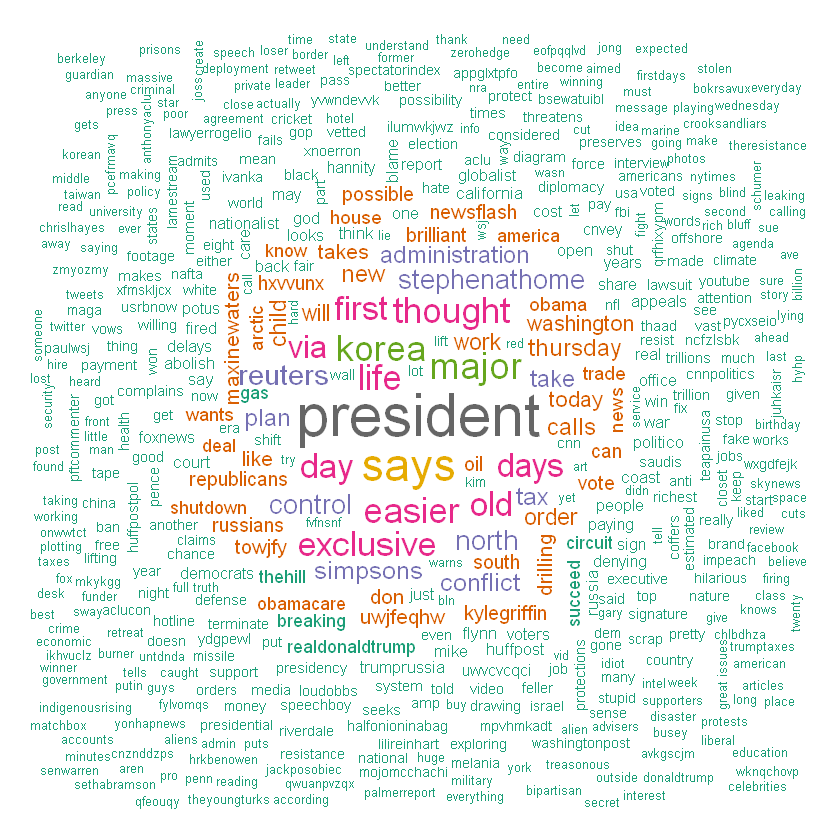

In [20]:
wordcloud(dm$word, dm$freq, random.order=FALSE, scale = c(3, 0.6), colors=brewer.pal(8, "Dark2"))